In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('train_sample.csv')

In [5]:
print('Dataset shape:', df.shape)
print(df.info())

Dataset shape: (2000000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  int64  
 6   day          int64  
 7   month        int64  
 8   dayofweek    int64  
 9   family       object 
 10  city         object 
 11  state        object 
 12  type         object 
dtypes: float64(1), int64(7), object(5)
memory usage: 198.4+ MB
None


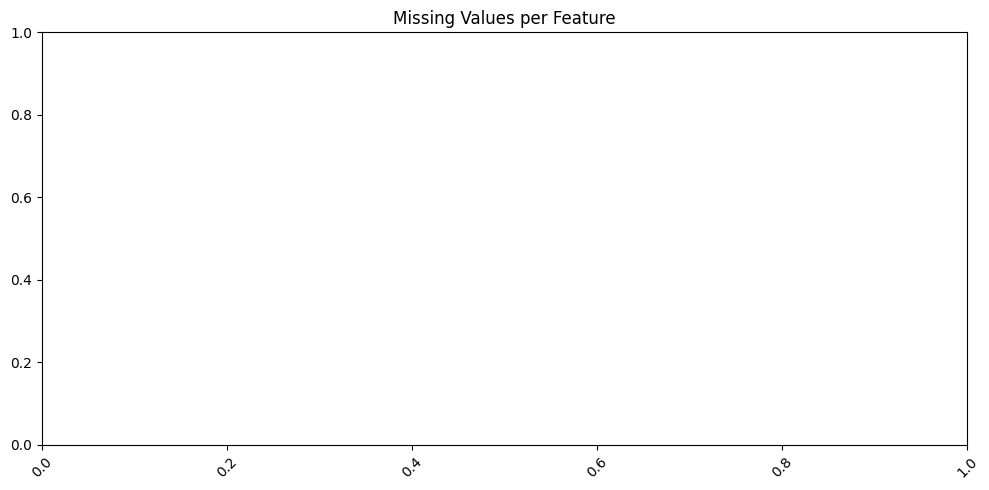

In [6]:
# -------------------- Missing Values --------------------
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Feature')
plt.tight_layout()
plt.show()

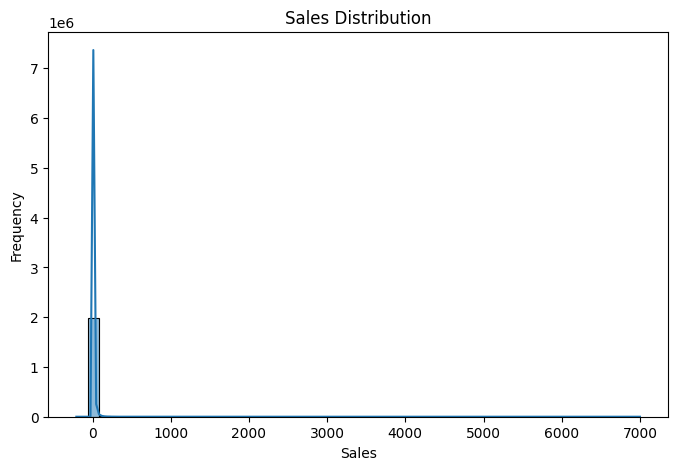

In [9]:
# -------------------- Sales Distribution --------------------
plt.figure(figsize=(8,5))
sns.histplot(df['unit_sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

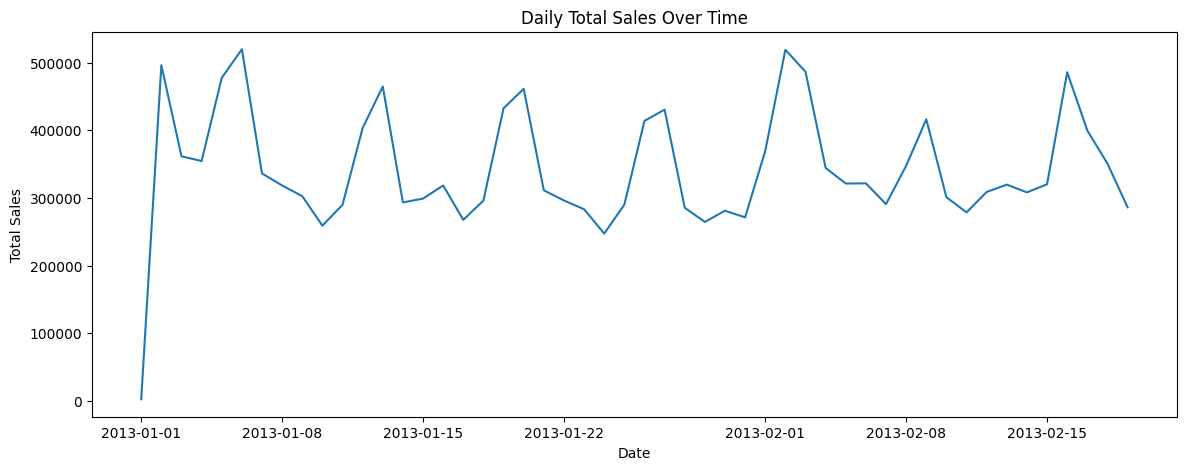

In [11]:
# -------------------- Time Series Trends --------------------
df['date'] = pd.to_datetime(df['date'])


daily_sales = df.groupby('date')['unit_sales'].sum().reset_index()
plt.figure(figsize=(14,5))
plt.plot(daily_sales['date'], daily_sales['unit_sales'])
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

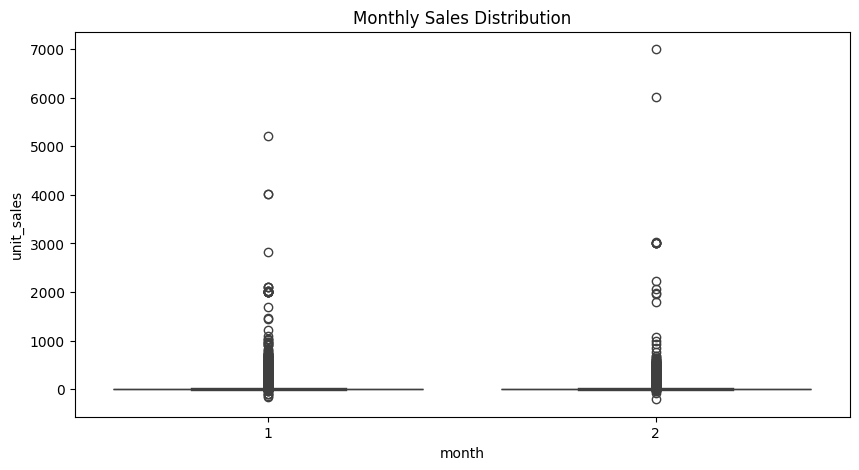

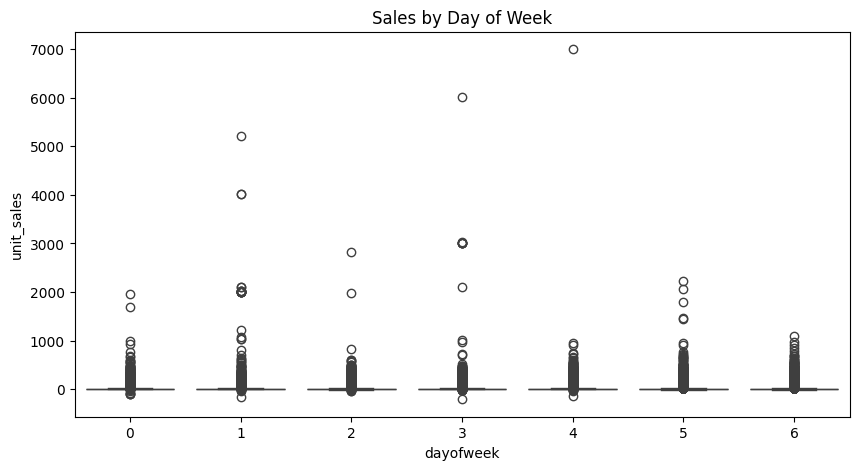

In [15]:
# -------------------- Seasonality --------------------
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek


plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='unit_sales', data=df)
plt.title('Monthly Sales Distribution')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x='dayofweek', y='unit_sales', data=df)
plt.title('Sales by Day of Week')
plt.show()

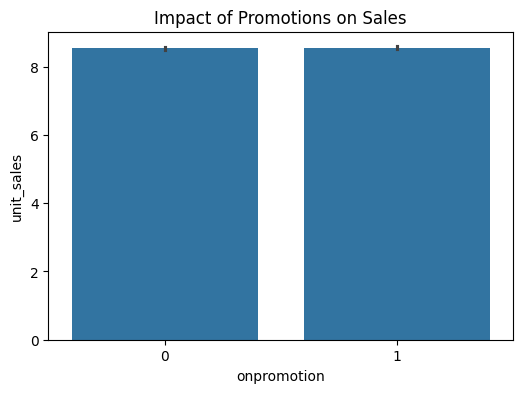

In [18]:
# -------------------- Promotions & Holidays --------------------
if "onpromotion" in df.columns:
    plt.figure(figsize=(6,4))
sns.barplot(x='onpromotion', y='unit_sales', data=df)
plt.title('Impact of Promotions on Sales')
plt.show()



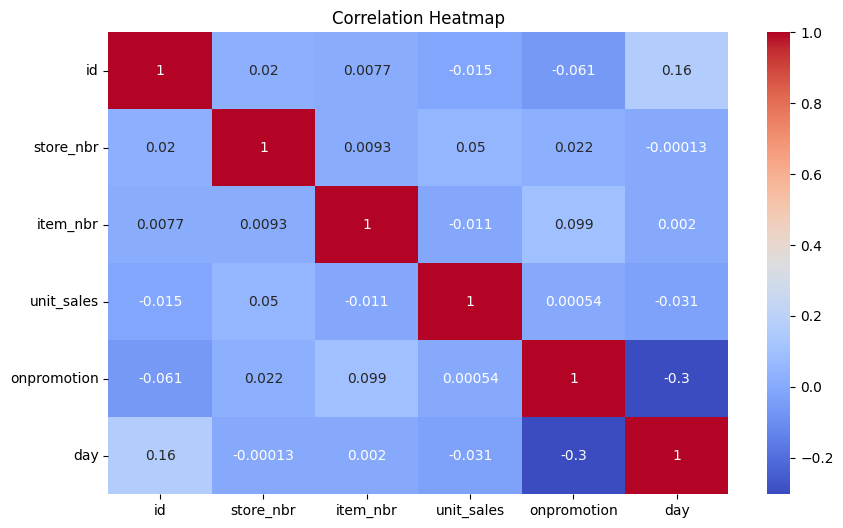

In [19]:
# -------------------- Correlation Heatmap --------------------
num_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

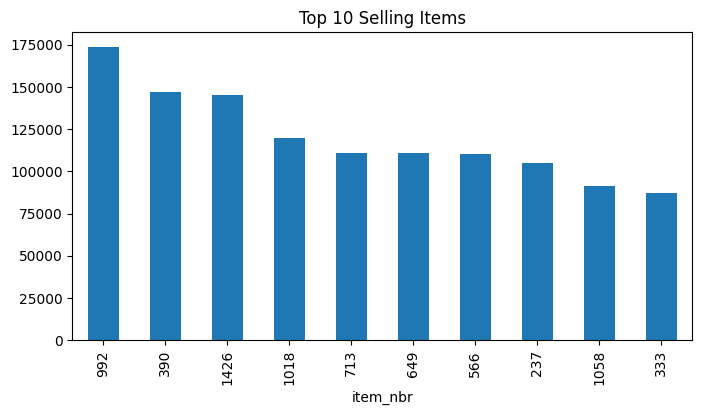

In [3]:
top_items = df.groupby('item_nbr')['unit_sales'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Selling Items')
plt.show()


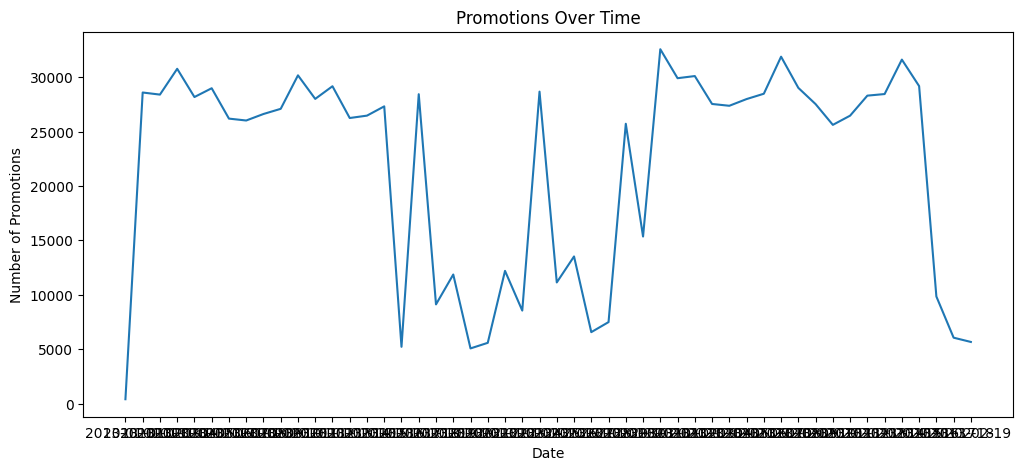

In [4]:
if 'onpromotion' in df.columns:
    promo_trend = df.groupby('date')['onpromotion'].sum().reset_index()
    plt.figure(figsize=(12,5))
    plt.plot(promo_trend['date'], promo_trend['onpromotion'])
    plt.title('Promotions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Promotions')
    plt.show()


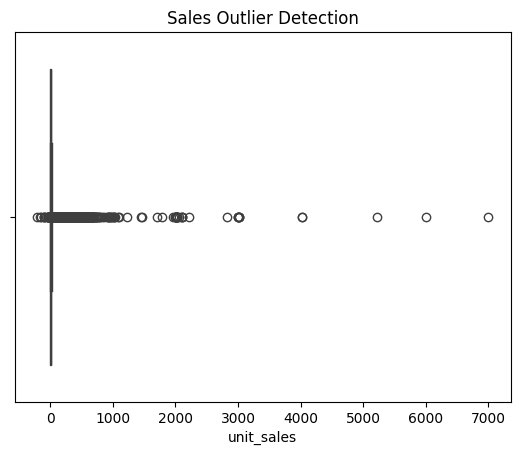

In [5]:
sns.boxplot(x=df['unit_sales'])
plt.title('Sales Outlier Detection')
plt.show()


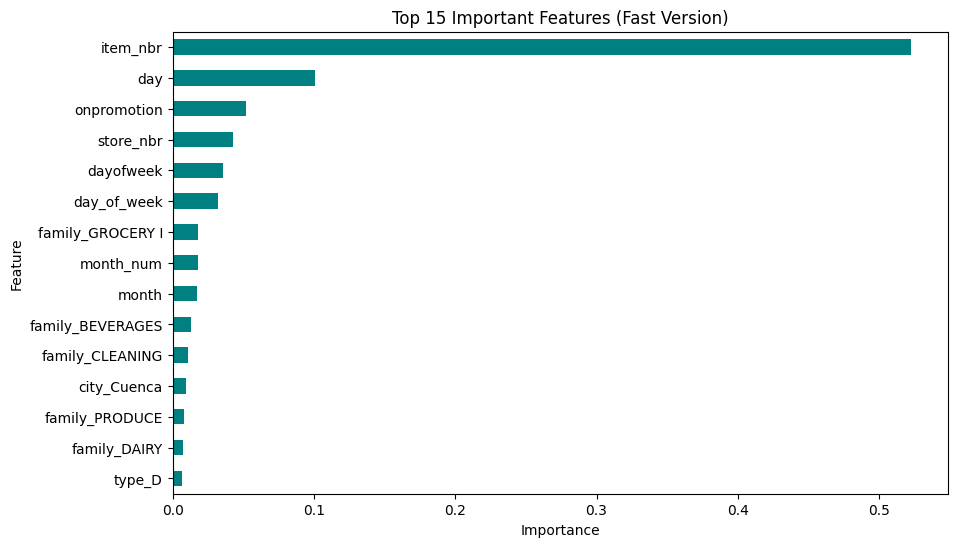

In [5]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor 
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('train_sample.csv')


if len(df) > 50000:
    df = df.sample(frac=0.05, random_state=42)


if not np.issubdtype(df['date'].dtype, np.datetime64):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')


df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek


df = df.drop(columns=['id', 'date'], errors='ignore')


df_encoded = pd.get_dummies(df, drop_first=True)


df_encoded = df_encoded.dropna()

target_col = 'unit_sales'

if target_col in df_encoded.columns:
    X = df_encoded.drop(columns=[target_col])
    y = df_encoded[target_col]

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
    model = ExtraTreesRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

  
    feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

   
    plt.figure(figsize=(10,6))
    feature_importance.head(15).plot(kind='barh', color='teal')
    plt.title('Top 15 Important Features (Fast Version)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()

else:
    print(' Column "unit_sales" not found in dataset')


C:\Users\Dell\AppData\Local\Temp\ipykernel_3016\4104169835.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='onpromotion', y='unit_sales', data=df, palette='coolwarm')


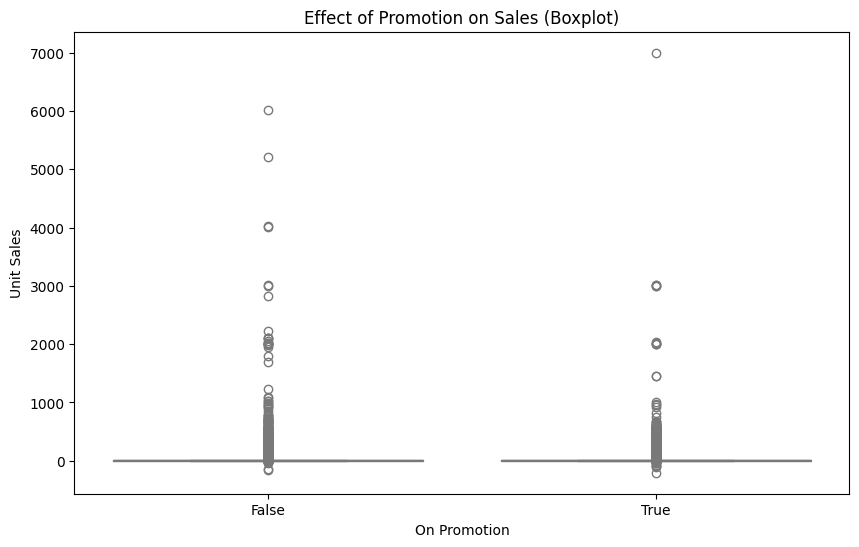

C:\Users\Dell\AppData\Local\Temp\ipykernel_3016\4104169835.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='onpromotion', y='unit_sales', data=avg_sales, palette='coolwarm')


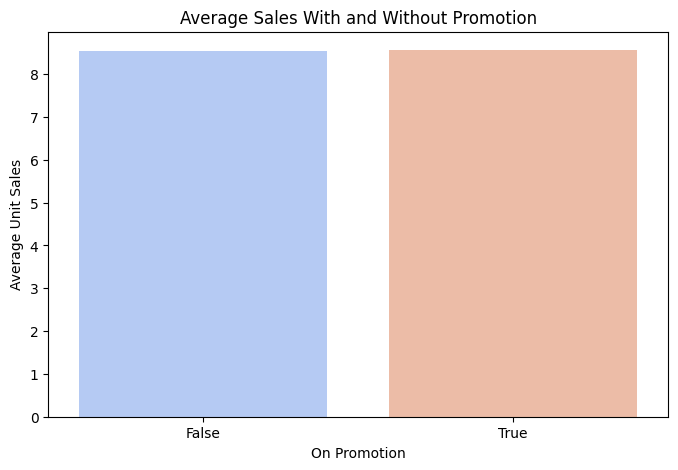

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


if 'onpromotion' in df.columns and 'unit_sales' in df.columns:
    
    df['onpromotion'] = df['onpromotion'].astype(bool)

    plt.figure(figsize=(10,6))
    sns.boxplot(x='onpromotion', y='unit_sales', data=df, palette='coolwarm')
    plt.title('Effect of Promotion on Sales (Boxplot)')
    plt.xlabel('On Promotion')
    plt.ylabel('Unit Sales')
    plt.show()

   
    plt.figure(figsize=(8,5))
    avg_sales = df.groupby('onpromotion')['unit_sales'].mean().reset_index()
    sns.barplot(x='onpromotion', y='unit_sales', data=avg_sales, palette='coolwarm')
    plt.title('Average Sales With and Without Promotion')
    plt.xlabel('On Promotion')
    plt.ylabel('Average Unit Sales')
    plt.show()
else:
    print(" Columns 'onpromotion' or 'unit_sales' not found in dataset.")
